<div class="alert alert-info">
Ссылка для просмотра ноутбука в интерактивном режиме для использования гиперссылок и корректного отображения разметки:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/data_analysis_python/4_visualisation/human_freedom.ipynb'>human_freedom</a></div>

### Визуализация
#### Данные Human Freedom Index

Описание данных:<br>
Данные по Human Freedom индексу, составляющих его субиндексах и индикаторах за 2008-2018 год, по странам.<br>
Показатели отражают, например, свободу торговли, свободу слова, религий, уровень преступности, верховенство права, свободу передвижения и т.д.<br>
https://www.kaggle.com/gsutters/the-human-freedom-index?select=hfi_cc_2020.csv

#### Задачи:
Провести базовый эксплоративный анализ данных посредством визуализации.


<p id="0">
<h4>Содержание</h4>
<ul type="square">
<a href="#01"><li>Знакомство с данными</li></a>
<a href="#1"><li>Динамика HF индекса</li></a>
    <ul>
    <a href="#1.1"><li>В среднем по миру</li></a>
    <a href="#1.2"><li>В среднем по регионам</li></a>
    <a href="#1.3"><li>Для регионов выше/ниже среднего</li></a>
    <a href="#1.4"><li>Сравнение России, региона и мира</li></a>
    </ul>
<a href="#2"><li>Топ стран улучшения/ухудшения HF индекса</li></a>
<a href="#3"><li>Сравнение топ-стран по HF индексу 2018 vs 2008</li></a>
<a href="#4"><li>Динамика составляющих индикаторов</li></a>
<a href="#5"><li>Динамика рейтинга России</li></a>
<a href="#6"><li>Индикатор свободы идентичности 2018 vs 2008</li></a>
        <ul>
        <a href="#6.1"><li>По регионам</li></a>
        <a href="#6.2"><li>По странам South Asia</li></a>
        </ul>
<a href="#7"><li>Сравнение России и Ирана по индексу и индикаторам в 2018</li></a>
<a href="#8"><li>Распределение индекса и индикаторов в 2018</li></a>
<a href="#9"><li>Корреляция индекса и индикаторов</li></a>
<a href="#10"><li>Индекс и индикаторы в среднем по регионам</li></a>
<a href="#11"><li>Распределение HF индекса 2018 vs 2008</li></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<p id="01">
<h4>Знакомство с данными</h4>

Загружаем данные, указываем использование нулевого столбца как индексного:

In [2]:
hfi = pd.read_csv('C:\\python\\portfolio\\data_analysis_python\\4_visualisation\\data\\human_freedom.csv', index_col = 0)

В датасете 112 столбцов и 1782 строки:

In [3]:
hfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 1781
Columns: 112 entries, year to womens_freedom
dtypes: float64(108), int64(1), object(3)
memory usage: 1.5+ MB


Чтобы все столбцы отобразились, меняем настройку:

In [4]:
pd.set_option('display.max_columns', 120)
hfi.head(5)

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_freedom,pf_religion_repression,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_entry,pf_association_assembly,pf_association_barries,pf_association_bans,pf_association_estopparties,pf_association_opposition,pf_association_civilrepression,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_media,pf_expression_cable,pf_expression_newspapers,pf_expression_control,pf_expression,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,4.3,5.0,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.5,8.8,9.3,10.0,10.0,10.0,10.0,9.0,9.0,9.6,8.0,8.9,8.8,10.0,7.8,8.2,8.0,7.8,8.2,8.6,10.0,10.0,5.0,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.81,49.0,8.2,6.7,8.0,9.0,7.0,8.0,9.5,8.1,3.6,3.7,4.9,8.3,5.7,3.9,6.7,5.6,1.0,5.2,10.0,9.7,9.6,10.0,9.8,9.7,9.3,8.1,9.0,6.8,9.4,8.1,10.0,4.2,4.6,8.3,5.7,8.2,10.0,9.2,10.0,9.7,5.6,4.9,5.6,8.0,6.3,10.0,6.7,5.7,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,6.3,4.4,4.7,5.3,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.5,8.8,9.3,10.0,10.0,10.0,10.0,8.2,9.0,9.6,8.0,8.7,7.9,10.0,8.0,8.2,8.1,7.9,8.3,8.4,10.0,10.0,5.0,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.86,47.0,8.1,6.7,8.0,9.0,7.0,8.0,6.2,7.4,3.8,3.9,5.1,8.3,5.5,4.4,6.6,6.8,1.0,5.4,9.2,9.7,9.6,10.0,9.6,9.6,9.3,8.1,9.0,6.0,9.4,7.7,10.0,4.2,5.4,8.3,5.9,8.2,10.0,9.1,10.0,9.7,5.6,5.4,6.4,8.0,6.3,10.0,6.9,6.3,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36.0,9.26
2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,6.7,4.5,4.7,5.3,8.6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,7.5,8.7,10.0,10.0,5.0,8.3,9.0,8.9,9.6,8.0,8.9,7.9,10.0,8.0,8.2,8.1,8.0,8.3,8.5,10.0,10.0,5.1,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.57,60.0,8.2,6.7,8.4,9.0,7.0,8.0,7.8,7.8,4.0,3.9,5.1,8.3,5.6,4.4,6.5,6.9,0.9,5.5,9.0,9.5,9.7,10.0,9.6,9.6,9.2,8.0,9.0,5.6,9.4,7.5,10.0,4.2,4.6,8.3,5.7,8.0,10.0,7.3,9.0,8.8,5.6,5.4,6.2,8.0,6.3,10.0,6.9,6.1,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36.0,7.50
3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,6.7,4.5,4.7,5.2,8.9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,7.5,8.8,5.0,10.0,5.0,6.7,9.0,8.9,9.2,8.5,8.9,7.9,10.0,8.0,8.2,8.1,8.0,8.3,8.5,10.0,10.0,5.3,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.40,6

Для дальнейшего изучения отберем следующие показатели:
* hf_score - Human Freedom индекс
* hf_rank - Human Freedom рейтинг
* pf_score - Personal Freedom индекс
* pf_rank - Personal Freedom рейтинг
* ef_score - Economic Freedom индекс
* ef_rank - Economic Freedom рейтинг
* pf_ss - орг конфликты, терроризм, исчезновения, убийства
* pf_movement_foreign - свобода передвижения через границы
* pf_religion - свобода вероисповедания
* pf_expression_media - свобода и независимость СМИ
* pf_identity - свобода идентичности (смена пола, ориентация, развод)
* ef_legal - независимость судов, соблюдение прав собственности, полиция усиливает соблюдение закона
* ef_money - денежная масса и реальный объем пр-ва, вариация инфляции, возможность иметь заграничные счета
* ef_trade - тарифы на международную торговлю, финансовая открытость, движение капитала 
* ef_regulation - регуляция кредитного рынка, рынка труда, бизнеса<br><br>
По всем показателям: чем выше значение тем "лучше" значение показателя, в зависимости от его смысла.

Сформируем основной набор данных с главным индексом hf_score и интересующими индикаторами:

In [5]:
hfi_sample = hfi.loc[:,['year','countries','region','hf_score',
                        'hf_rank','pf_score','pf_rank','ef_score','ef_rank',
                       'pf_ss','pf_movement_foreign',
                       'pf_religion','pf_expression_media','pf_identity',
                       'ef_legal','ef_money','ef_trade','ef_regulation']]

В основном наборе данных 18 столбцов, по некоторым из них есть пропуски. Судя по предварительному просмотру выше у всех показателей (кроме страны и региона) числовые значения. Типы данных определились корректно, значит нет "нечисловых" символов, которые могут означать пропуски:

In [6]:
hfi_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 1781
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1782 non-null   int64  
 1   countries            1782 non-null   object 
 2   region               1782 non-null   object 
 3   hf_score             1702 non-null   float64
 4   hf_rank              1702 non-null   float64
 5   pf_score             1702 non-null   float64
 6   pf_rank              1702 non-null   float64
 7   ef_score             1702 non-null   float64
 8   ef_rank              1702 non-null   float64
 9   pf_ss                1702 non-null   float64
 10  pf_movement_foreign  1691 non-null   float64
 11  pf_religion          1771 non-null   float64
 12  pf_expression_media  1702 non-null   float64
 13  pf_identity          1702 non-null   float64
 14  ef_legal             1782 non-null   float64
 15  ef_money             1702 non-null   f

Убираем строки с пропусками по главному индексу:

In [7]:
hfi_sample = hfi_sample[hfi_sample.hf_score.notna()]

Число строк сокращается до 1702. Остается несколько показателей с незначительным количеством пропусков. На данный момент для задач визуализации оставим как есть: 

In [8]:
hfi_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1781
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1702 non-null   int64  
 1   countries            1702 non-null   object 
 2   region               1702 non-null   object 
 3   hf_score             1702 non-null   float64
 4   hf_rank              1702 non-null   float64
 5   pf_score             1702 non-null   float64
 6   pf_rank              1702 non-null   float64
 7   ef_score             1702 non-null   float64
 8   ef_rank              1702 non-null   float64
 9   pf_ss                1702 non-null   float64
 10  pf_movement_foreign  1691 non-null   float64
 11  pf_religion          1693 non-null   float64
 12  pf_expression_media  1702 non-null   float64
 13  pf_identity          1702 non-null   float64
 14  ef_legal             1702 non-null   float64
 15  ef_money             1702 non-null   f

Посмотрим на статистики. Судя по описанию показателей нулевые значения - это не пустоты, это минимальное значение показателей:

In [9]:
pd.set_option("precision", 3)
hfi_sample.describe()

,year,hf_score,hf_rank,pf_score,pf_rank,ef_score,ef_rank,pf_ss,pf_movement_foreign,pf_religion,pf_expression_media,pf_identity,ef_legal,ef_money,ef_trade,ef_regulation
count,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1691.000,1693.000,1702.000,1702.000,1702.000,1702.000,1701.000,1702.000
mean,2013.137,7.008,77.843,7.168,77.867,6.842,77.802,8.106,7.658,7.533,5.279,7.210,5.309,8.154,7.057,7.061
std,3.141,1.075,44.984,1.397,44.973,0.929,44.996,1.462,3.498,1.487,2.512,3.184,1.404,1.405,1.289,1.038
min,2008.000,3.600,1.000,2.310,1.000,2.720,1.000,3.500,0.000,1.200,0.000,0.000,2.200,0.700,1.800,2.500
25%,2010.000,6.260,39.000,6.143,39.000,6.220,39.000,7.200,5.000,6.700,3.300,5.000,4.300,7.100,6.200,6.500
50%,2013.000,6.990,78.000,7.190,78.000,6.950,78.000,8.300,10.000,7.900,5.000,8.800,5.200,8.400,7.200,7.100
75%,2016.000,7.960,116.000,8.390,116.000,7.570,116.000,9.500,10.000,8.600,7.500,10.000,6.200,9.400,8.100,7.800
max,2018.000,8.990,162.000,9.590,162.000,8.970,162.000,10.000,10.000,9.900,10.000,10.000,8.500,9.900,9.600,9.500


Для дальнейшего построения графиков увеличим их размер по умолчанию:

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 5

<a href="#0"><h4>Наверх</h4></a>

<p id="1">
<h4>Динамика Human Freedom индекса</h4>
<p id="1.1">
<h5>В среднем по миру</h5>

Для графика подготовим группировку по годам и расчет среднего:

In [11]:
hf_score_dynamic = hfi_sample.groupby('year').hf_score.mean()

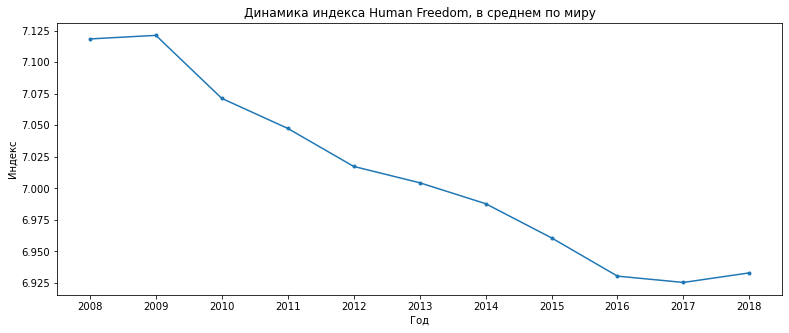

In [12]:
hf_score_dynamic.plot(
                      title = 'Динамика индекса Human Freedom, в среднем по миру',
                      xlabel = 'Год',
                      ylabel = 'Индекс',
                      xticks = range(2008, 2019, 1),
                      style = '.-');

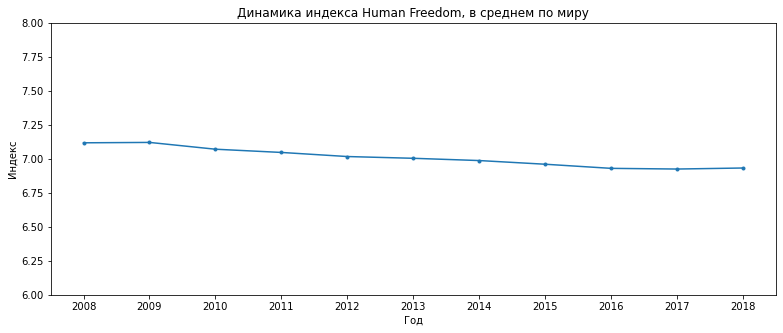

In [13]:
hf_score_dynamic.plot(
                      title = 'Динамика индекса Human Freedom, в среднем по миру',
                      xlabel = 'Год',
                      ylabel = 'Индекс',
                      xticks = range(2008, 2019, 1),
                      ylim = (6,8),
                      style = '.-');

* Первый график визуально преувеличивает падание показателя, на самом деле индекс снизился всего с 7.1 до 6.9 за 10 лет. На втором графике видно, как меняется восприятие в зависимости от границ по оси y.
* В целом тренд отрицательный. 
* Есть незначительная положительная динамика между 2008 и 2009.
* Между 2009 и 2017 индекс устойчиво снижался.
* Между 2017 и 2018 снова незначительная положительная динамика.

<a href="#0"><h4>Наверх</h4></a>

<p id="1.2">
<h5>В среднем по регионам</h5>

Для графика подготовим сводную таблицу с годами по строкам, регионами по столбцам и расчетом среднего:

In [14]:
hf_score_dynamic_by_region = hfi_sample.pivot_table(index = 'year', columns = 'region',
                                                    values = 'hf_score', aggfunc = 'mean')

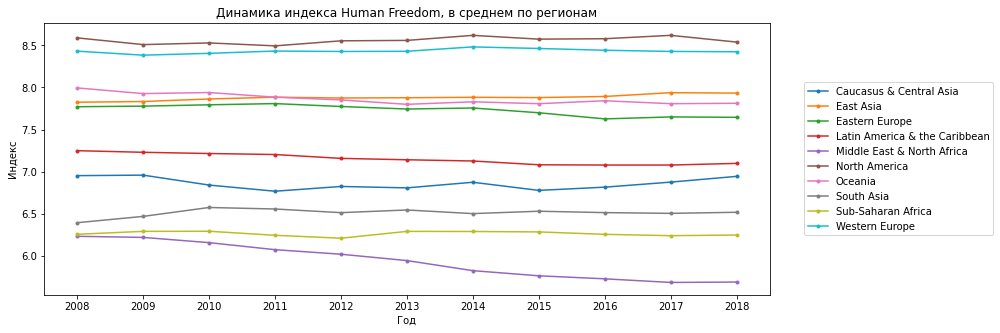

In [15]:
(hf_score_dynamic_by_region.plot(title = 'Динамика индекса Human Freedom, в среднем по регионам',
                      xlabel = 'Год',
                      ylabel = 'Индекс',
                      xticks = range(2008, 2019, 1),
                      style = '.-').
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* На данном графике индексы регионов выглядят достаточно стабильно.
* Явную тенденцию демонстрирует только Middle East & North Africa - отрицательная динамика (масштаб изменения в пределах одной единицы).
* По значениям индекса напрашивается "кластеризация" регионов:
    - индекс около 8.5 (North America, Western Europe)
    - около 8.0 (East Asia, Oceania, Eastern Europe)
    - менее 7.5 (Latin America & the Caribbean,Caucasus & Central Asia, South Asia,Sub-Saharan Africa, Middle East & North Africa)

Для более явной визуализации динамики рассмотрим две группы регионов отдельно: выше и ниже среднерегионального уровня.

<a href="#0"><h4>Наверх</h4></a>

<p id="1.3">
<h5>Для регионов выше среднего уровня</h5>

Посчитаем средние значения по регионам и между регионами:

In [18]:
hf_by_reg = hfi_sample.groupby('region').hf_score.mean().sort_values(ascending = False)
hf_mean_reg = round(hfi_sample.groupby('region').hf_score.mean().sort_values(ascending = False).mean(), 3)

In [19]:
print('Средние значения индекса по регионам:')
print(hf_by_reg)
print()
print('Среднерегиональное значение')
print(hf_mean_reg)

Средние значения индекса по регионам:
region
North America                    8.561
Western Europe                   8.433
East Asia                        7.881
Oceania                          7.864
Eastern Europe                   7.731
Latin America & the Caribbean    7.150
Caucasus & Central Asia          6.854
South Asia                       6.513
Sub-Saharan Africa               6.262
Middle East & North Africa       5.916
Name: hf_score, dtype: float64

Среднерегиональное значение
7.316


Составим списки регионов выше и ниже среднего уровня:

In [23]:
reg_over_mean = hf_by_reg[hf_by_reg >= hf_mean_reg].index
reg_below_mean = hf_by_reg[hf_by_reg < hf_mean_reg].index

Для графика используем сводную по годам и регионам из предыдущего пункта:

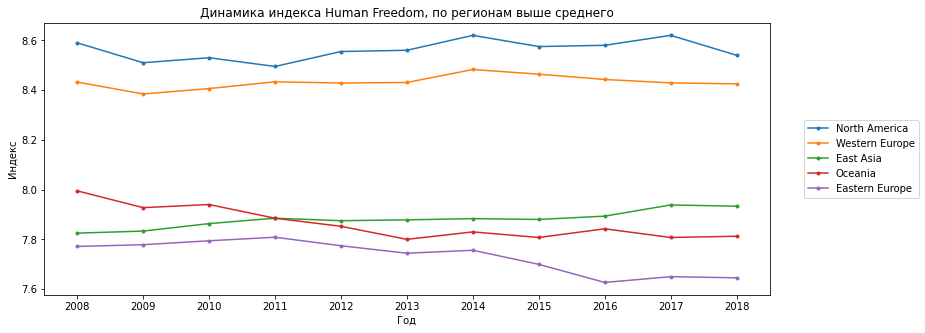

In [24]:
(hf_score_dynamic_by_region[reg_over_mean].
                      plot(title = 'Динамика индекса Human Freedom, по регионам выше среднего',
                      xlabel = 'Год',
                      ylabel = 'Индекс',
                      xticks = range(2008, 2019, 1),
                      style = '.-').
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Из всей группы некоторый негативный тренд просматривается только у региона Eastern Europe (с масштабом изменения в пределах меньше пол-единицы). По остальным регионам ситуация достаточно стабильная.
* Самый высокий индекс в регионе North America. Любопытно есть ли там индикаторы с негативным трендом.
* Индекс East Asia до 2011 года уступал Oceania, а после стал выше.

##### Для регионов ниже среднего уровня

Для графика используем сводную по годам и регионам из предыдущего пункта:

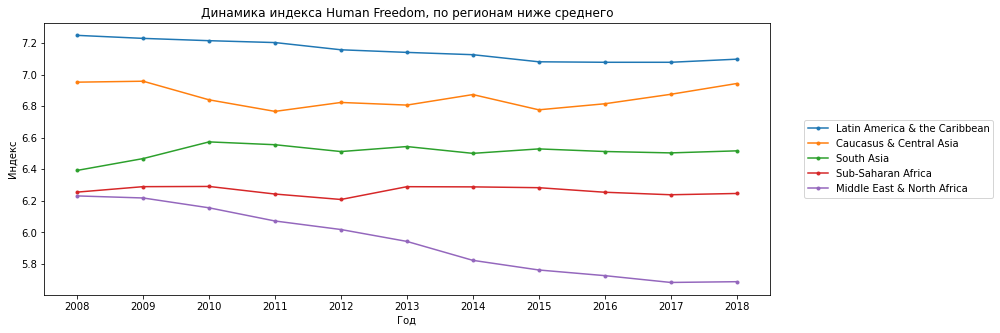

In [25]:
(hf_score_dynamic_by_region[reg_below_mean].
                      plot(title = 'Динамика индекса Human Freedom, по регионам ниже среднего',
                      xlabel = 'Год',
                      ylabel = 'Индекс',
                      style = '.-',
                      xticks = range(2008, 2019, 1)).
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Явную тенденцию (отрицательную) демонстрирует только Middle East & North Africa (масштаб изменения в пределах пол-единицы).
* Наблюдается незначительное снижение в регионе Latin America & the Caribbean.

<a href="#0"><h4>Наверх</h4></a>

<p id="1.4">
<h5>Сравнение России, региона и мира</h5>

На одно полотно нанесем три графика:<br>
* значение индекса России по годам
* среднее значение по региону Восточной Европы по годам
* среднее значение по миру по годам:

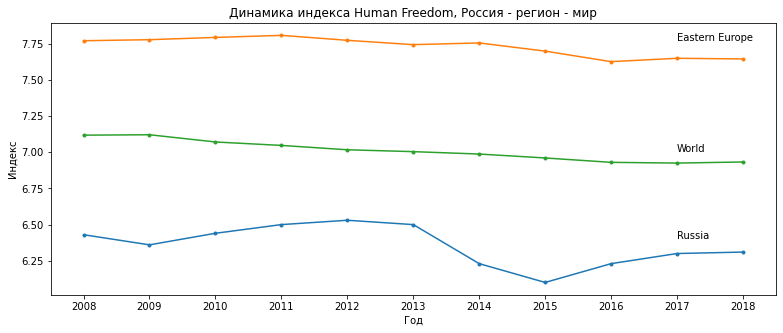

In [26]:
(hfi_sample[hfi_sample.countries == 'Russian Federation'][['year','hf_score']].
 set_index('year').
     plot(title = 'Динамика индекса Human Freedom, Россия - регион - мир',
     xlabel = 'Год', ylabel = 'Индекс', style = '.-',
     legend = False, xticks = range(2008, 2019, 1)).
         text(2017, 6.4, 'Russia'));

(hf_score_dynamic_by_region['Eastern Europe'].
 plot(xlabel = 'Год', ylabel = 'Индекс', style = '.-').
     text(2017, 7.77, 'Eastern Europe'));

hf_score_dynamic.plot(xlabel = 'Год', ylabel = 'Индекс', style = '.-').text(2017, 7, 'World');

* На протяжении всего периода индекс России ниже как среднемирового, так и среднего по региону (Восточная Европа).
* Индекс России демонстрирует бОльшую волатильность (но в пределах пол-единицы), чем средний по миру и средний по региону.
* Максимальное значение индекса в России - 2013 год, минимальное значение индекса - 2015 год. Любопытно какие из индикаторов привели к минимуму.

<a href="#0"><h4>Наверх</h4></a>

<p id="2">
<h4>Топ стран с улучшенным / ухудшенным Human Freedom индексом между 2008 и 2018</h4>

Подготовим датафреймы.

Отбираем нужные столбцы, два года: 2008 и 2018 и сортируем по году:

In [27]:
score_dif = hfi_sample[hfi_sample.year.isin([2008,2018])].loc[:,['year','countries','hf_score']].sort_values(by = 'year')

Считаем разницу индекса между годами в отдельный столбец:

In [28]:
g = score_dif.groupby('countries')
score_dif['score_dif'] = g['hf_score'].apply(lambda x: x - x.shift())

Нам нужны страны, у которых есть значения индекса для обоих годов, так как только в этом случае возможен расчет разницы. Для строк 2008 года разница пустует. В строках 2018 есть 141 значение разницы при 162 значениях индекса, так как у некоторых стран есть значение индекса только в 2018 и нет в 2008:

In [29]:
score_dif.groupby('year').count()

,countries,hf_score,score_dif
year,,,
2008,141,141,0
2018,162,162,141


Убираем пустоты по столбцу score_dif, должна остаться 141 строка:

In [30]:
print(score_dif.shape) 
score_dif = score_dif.dropna() 
print(score_dif.shape)

(303, 4)
(141, 4)


Формируем ТОП-10 стран по улучшенному score_dif:

In [31]:
top_hf_dyn = score_dif.sort_values(by = 'score_dif', ascending = False).head(10)
top_hf_dyn.set_index('countries', inplace = True)
top_hf_dyn

,year,hf_score,score_dif
countries,,,
Sri Lanka,2018,6.72,1.14
Myanmar,2018,5.45,0.91
Zimbabwe,2018,5.59,0.62
Taiwan,2018,8.42,0.59
Malaysia,2018,6.90,0.53
Mozambique,2018,6.64,0.47
Kyrgyz Republic,2018,7.05,0.43
Croatia,2018,7.92,0.43
Dominican Republic,2018,7.37,0.41


Формируем ТОП-10 стран по ухудшенному score_dif:

In [32]:
bottom_hf_dyn = score_dif.sort_values(by = 'score_dif').head(10)
bottom_hf_dyn.set_index('countries', inplace = True)
bottom_hf_dyn

,year,hf_score,score_dif
countries,,,
"Venezuela, RB",2018,4.08,-1.28
Syrian Arab Republic,2018,3.97,-1.16
"Egypt, Arab Rep.",2018,4.67,-1.09
Bahrain,2018,6.18,-0.95
Turkey,2018,6.27,-0.77
Nicaragua,2018,6.54,-0.75
"Iran, Islamic Rep.",2018,4.53,-0.69
Thailand,2018,6.37,-0.64
Mauritius,2018,7.55,-0.62


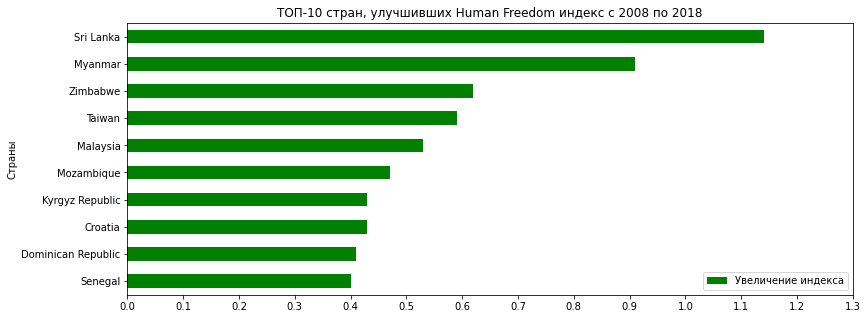

In [33]:
top_hf_dyn_pl = (top_hf_dyn.drop(['hf_score','year'], axis = 1).
                 plot(
                    kind = 'barh',
                    title = 'ТОП-10 стран, улучшивших Human Freedom индекс с 2008 по 2018',
                    xlabel = 'Страны',
                    xticks = np.arange(0, 1.4, 0.1),
                    color = 'g'));
                 
top_hf_dyn_pl = plt.gca().invert_yaxis();

leg = plt.legend()
leg.get_texts()[0].set_text('Увеличение индекса')

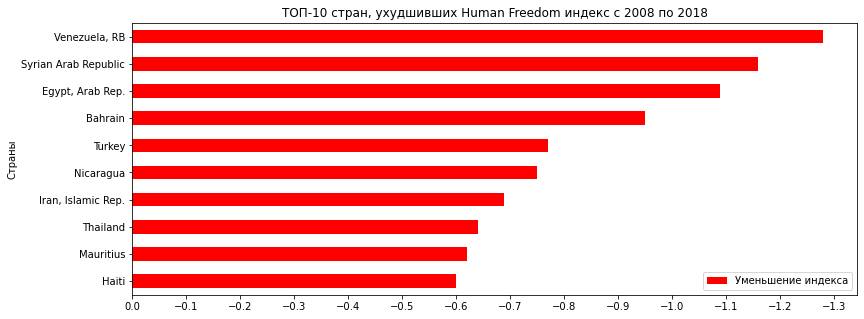

In [34]:
bottom_hf_dyn_pl = (bottom_hf_dyn.drop(['hf_score','year'], axis = 1).
                    plot(
                        kind = 'barh', 
                        title = 'ТОП-10 стран, ухудшивших Human Freedom индекс с 2008 по 2018',
                        xlabel = 'Страны',
                        xticks = np.arange(-1.3, 0.1, 0.1),
                        color = 'r'));

bottom_hf_dyn_pl = plt.gca().invert_yaxis();
bottom_hf_dyn_pl = plt.gca().invert_xaxis();

leg = plt.legend()
leg.get_texts()[0].set_text('Уменьшение индекса')

* За 10 лет изменения индекса не такие уж значительные.
* Увеличение: самое большее у Sri Lanka на 1.1, у страны на 10 месте всего на 0.4.
* Среди ТОП-10 по увеличению только одна европейская страна Croatia.
* Снижение: самое большее у Venezuela на 1.2, у страны на 10 месте всего на 0.6.

<a href="#0"><h4>Наверх</h4></a>

<p id="3">
<h4>Сравнение топ-стран по Human Freedom индексу 2018 vs 2008</h4>

Для графиков подготовим два датафрейма: страна и индекс по убыванию индекса за 2008 и за 2018 годы, первые 10 строк:

In [35]:
top_2008 = (hfi_sample[hfi_sample.year == 2008].
            sort_values(by = 'hf_score', ascending = False).
            loc[:,['countries','hf_score']].
            set_index('countries').
            head(10))

top_2018 = (hfi_sample[hfi_sample.year == 2018].
            sort_values(by = 'hf_score', ascending = False).
            loc[:,['countries','hf_score']].
            set_index('countries').
            head(10))

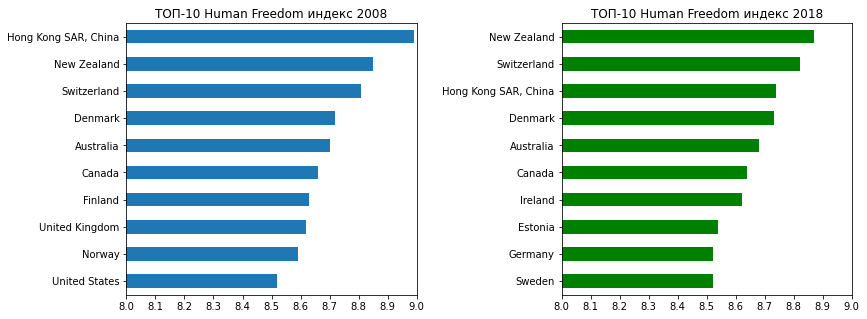

In [36]:
fig, ax = plt.subplots(1,2)

top_2008.plot(kind = 'barh', xlabel = '',
              ax = ax[0], title = "ТОП-10 Human Freedom индекс 2008",
              legend = False, xlim = [8, 9], xticks = np.arange(8, 9.1, 0.1))
ax[0].invert_yaxis()

top_2018.plot(kind = 'barh', xlabel = '',
              ax = ax[1], title = "ТОП-10 Human Freedom индекс 2018",
              legend = False, color = 'g', xlim = [8, 9], xticks = np.arange(8, 9.1, 0.1))
ax[1].invert_yaxis()

plt.subplots_adjust(wspace = 0.5)

* Амплитуда значений индекса в ТОП-10 почти не изменилась между 2008 и 2018: от 8.5 до 9.
* Участники первой тройки не изменились, но поменялись местами: Hong Kong спустился с 1го на 3е место, Switzerland поднялась с 3го на 2е, а New Zealand поднялась со 2го на 1е.
* С 4го по 6е места ситуация осталась неизменной: Denmark, Australia, Canada.
* На оставшихся с 7го по 10 места полностью сменились участники. ТОП-10 покинули: Finland, UK, Norway, USA. На их места пришли: Ireland, Estonia, Germany, Sweden.

<a href="#0"><h4>Наверх</h4></a>

<p id="4">
<h4>Динамика составляющих индикаторов</h4>

Оставим в датасете только составляющие индексов (индикаторы): уберем сам главный индекс, его субиндексы и рейтинги. Для графика подготовим сводную таблицу с годами по строкам, индикаторами по столбцам и расчетом среднего:

In [37]:
hfi_indics_dynamic = (hfi_sample.
                      drop(['hf_score','hf_rank','pf_score','pf_rank','ef_score','ef_rank'], axis = 1).
                      groupby('year').mean())

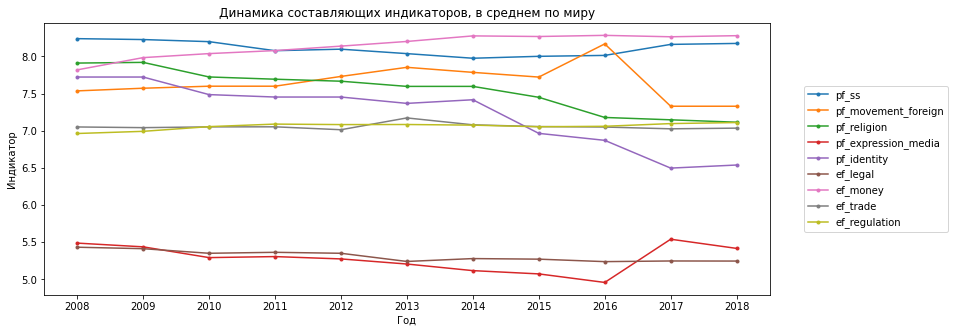

In [38]:
(hfi_indics_dynamic.plot(
                    title = 'Динамика составляющих индикаторов, в среднем по миру',
                    xlabel = 'Год',
                    ylabel = 'Индикатор',
                    xticks = range(2008, 2019, 1),
                    style = '.-').
                            legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

По значению выделяется подгруппа индикаторов pf_expression_media и ef_legal. Рассмотрим их отдельно.

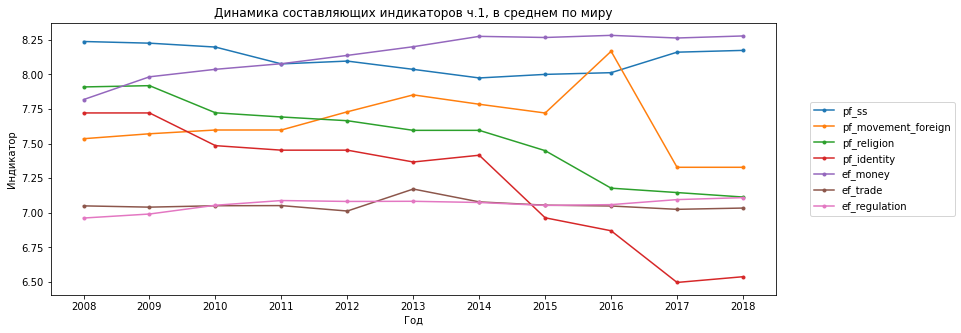

In [39]:
(hfi_indics_dynamic.drop(['pf_expression_media','ef_legal'], axis = 1).
                            plot(title = 'Динамика составляющих индикаторов ч.1, в среднем по миру',
                            xlabel = 'Год',
                            ylabel = 'Индикатор',
                            xticks = range(2008, 2019, 1),
                            style = '.-').
                                 legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Такое количество индикаторов на одном графике не очень читабельно.
* Тем не менее наблюдается отрицательная динамика по pf_identity (свободе идентичности) (масштаб изменения в пределах единицы) и pf_religion (свободе вероисповедания) (масштаб изменения в пределах пол-единицы) .
* По pf_movement_foreign (свободе перемещения заграницу) выраженный скачок в 2016 (масштаб изменения в пределах единицы). Любопытно за счет каких регионов/стран этот скачок.
* С 2011 самый высокий показатель по ef_money (денежная надежность).

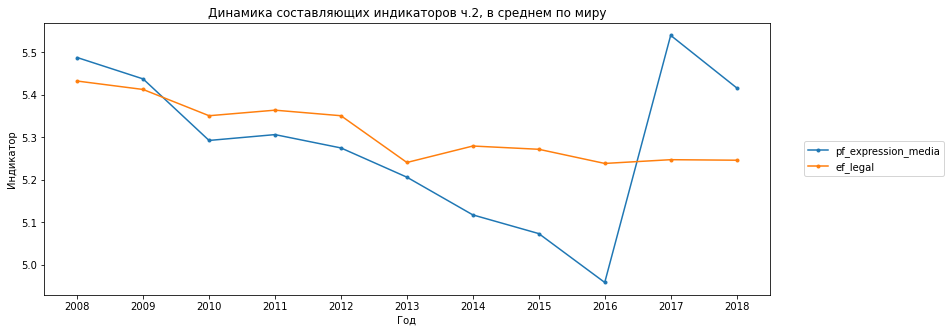

In [40]:
(hfi_indics_dynamic[['pf_expression_media','ef_legal']].
             plot(title = 'Динамика составляющих индикаторов ч.2, в среднем по миру',
                  xlabel = 'Год',
                  ylabel = 'Индикатор',
                  xticks = range(2008, 2019, 1),
                  style = '.-').
                         legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Негативный тренд по pf_expression_media (независимые СМИ) до 2016, затем скачок и снова негативная тенденция (масштаб изменения в пределах единицы).

<a href="#0"><h4>Наверх</h4></a>

<p id="5">
<h4>Динамика рейтинга России по HF индексу и субиндексам</h4>

Для графика фильтруем исходный датафрейм по России и отбираем нужные показатели:

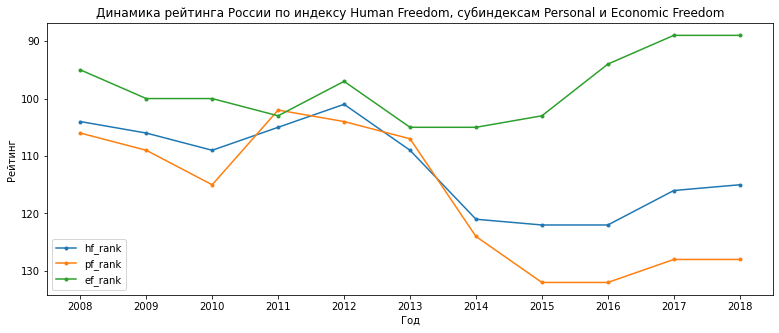

In [41]:
russia_rank = (hfi_sample[hfi_sample.countries == 'Russian Federation']
                           [['year','hf_rank','pf_rank','ef_rank']].
                               set_index('year').
                                plot(
                                title = 'Динамика рейтинга России по индексу Human Freedom, субиндексам Personal и Economic Freedom',
                                xlabel = 'Год',
                                ylabel = 'Рейтинг',
                                xticks = range(2008, 2019, 1),
                                style = '.-'));
russia_rank = plt.gca().invert_yaxis();

* С 2013 значительное падение в рейтинге по субиндексу Personal Freedom.
* При этом начало положительного тренда по Economic Freedom.
* К минимуму по HF индексу в 2015 вероятно привели индикаторы относящиеся к Personal Freedom.
* До 2013 рейтинги по индексу и субиндексам были достаточно близки друг к другу по значениям.
* С 2014 разница значений рейтингов стала гораздо более заметной.
* На протяжении почти всего времени самый высокий рейтинг у субиндекса Economic Freedom.

<a href="#0"><h4>Наверх</h4></a>

<p id="6">
<h4>Индикатор свободы идентичности 2018 vs 2008</h4>

<p id="6.1">
<h5>По регионам</h5>

Для графика подготовим сводную таблицу с регионами по строкам, годами (2008 и 2018) по столбцам и расчетом среднего по индикатору pf_identity:

In [42]:
ident_indic_by_region_08_18 = (hfi_sample[hfi_sample.year.isin([2008, 2018])].
                               pivot_table(index = 'region', columns = 'year',
                                           values = 'pf_identity', aggfunc = 'mean'))

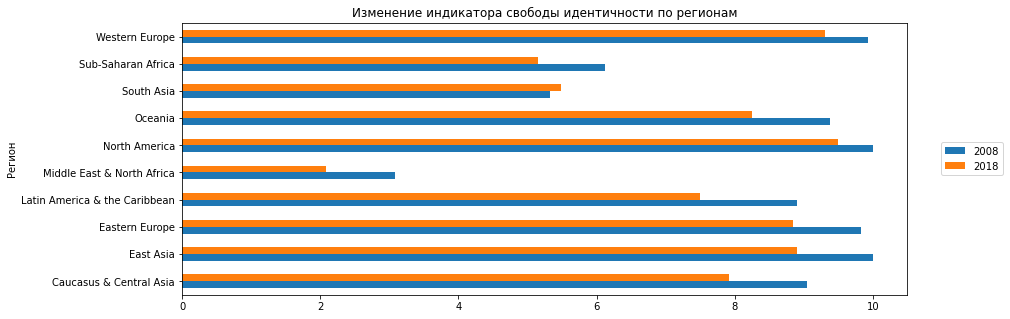

In [43]:
(ident_indic_by_region_08_18.plot(kind = 'barh',
                                title = 'Изменение индикатора свободы идентичности по регионам',
                                xlabel = 'Регион').
                                     legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Снижение индикатора между 2008 и 2018 по всем регионам кроме South Asia.

Посмотрим динамику индикатора внутри региона South Asia, по странам. В регионе 17 стран, в целом не слишком много для читабельности графика:

In [44]:
hfi_sample[hfi_sample.year == 2018].groupby('region').countries.count()

region
Caucasus & Central Asia           6
East Asia                         6
Eastern Europe                   22
Latin America & the Caribbean    26
Middle East & North Africa       19
North America                     2
Oceania                           4
South Asia                       17
Sub-Saharan Africa               42
Western Europe                   18
Name: countries, dtype: int64

<a href="#0"><h4>Наверх</h4></a>

<p id="6.2">
<h5>По странам South Asia</h5>

Для графика подготовим сводную таблицу со странами по строкам (региона South Asia), годами по столбцам (2008 и 2018) и расчетом среднего по индикатору pf_identity:

In [45]:
ident_indic_south_asia_08_18 = (
    hfi_sample[(hfi_sample.year.isin([2008, 2018])) & (hfi_sample.region == 'South Asia')].
            pivot_table(
            index = 'countries', columns = 'year', values = 'pf_identity', aggfunc = 'mean'))

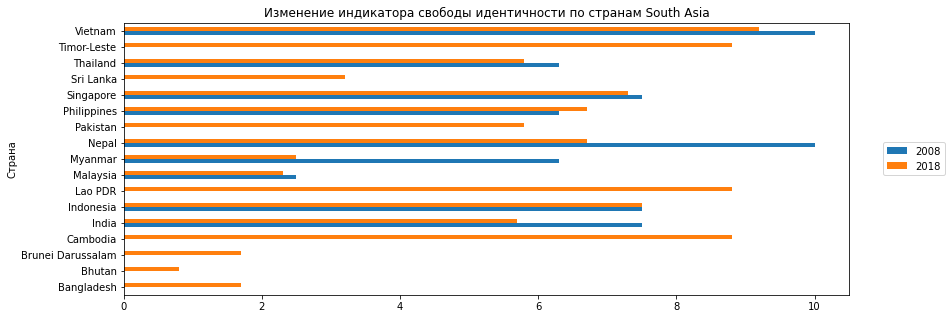

In [46]:
(ident_indic_south_asia_08_18.plot(kind = 'barh',
                                title = 'Изменение индикатора свободы идентичности по странам South Asia',
                                xlabel = 'Страна').
                                     legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* По нескольким странам данные о свободе идентичности есть за 2018 и нет за 2008. В некоторых из них значения достаточно высокие. Возможно в этом причина роста показателя по региону. Нужно сравнивать страны like-to-like.
* Снижение индикатора среди всех стран кроме Philippines (увеличение) и Indonesia (без изменений).
* Самое высокое значение в 2018 у Vietnam, самое низкое Bhutan.

<a href="#0"><h4>Наверх</h4></a>

<p id="7">
<h4>Сравнение России и Ирана по индексу и индикаторам в 2018</h4>

Проверяем, как именно пишется Иран в датасете. Затем для графика фильтруем исходный датафрейм по Ирану и России, 2018 году и убираем мешающие столбцы года и региона и показатели рейтингов. Транспонируем, чтобы индексы и индикаторы были по строкам.

In [47]:
hfi_sample[ hfi_sample['countries'].str.contains('iran', case = False) ]['countries'].unique()

array(['Iran, Islamic Rep.'], dtype=object)

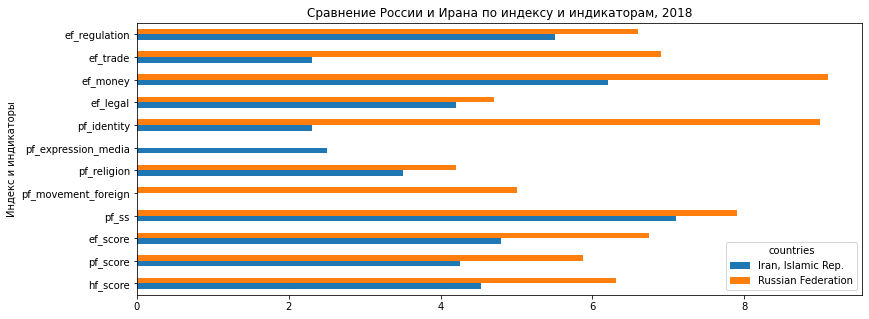

In [48]:
(hfi_sample[(hfi_sample.countries.isin(['Russian Federation', 'Iran, Islamic Rep.']))
                   & (hfi_sample.year == 2018)].
                         drop(['year','region','hf_rank','pf_rank','ef_rank'], axis = 1).
                             set_index('countries').
                                 transpose().
                                     plot(kind = 'barh',
                                     title = 'Сравнение России и Ирана по индексу и индикаторам, 2018',
                                     xlabel = 'Индекс и индикаторы'));

* В последнее время случаются сравнения России с Ираном, посмотрим на это сравнение по индикаторам.
* В 2018 Россия превосходит Иран по всем показателям.
* По свободе СМИ по России либо нет данных либо самый низкий показатель 0.
* По свободе заграничного передвижения наоборот - по Ирану либо нет данных либо самый низкий показатель 0.
* Наибольший разрыв между странами - по индикатору свободы идентичности.
* Наименьший разрыв по ef_legal (независимость судов).

<a href="#0"><h4>Наверх</h4></a>

<p id="8">
<h4>Распределение индекса и индикаторов в 2018</h4>

Для графика фильтруем датафрейм до 2018 году и оставляем только показатели индексов и индикаторов:

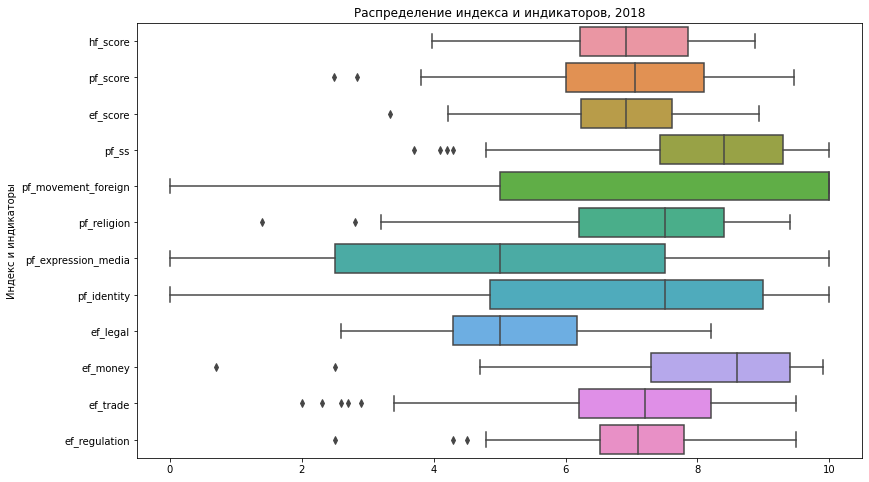

In [49]:
plt.figure(figsize = (13, 8))
score_indics_box_18 = (sns.boxplot(
                           data = hfi_sample[hfi_sample.year == 2018].
                                        drop(['year','countries','region','hf_rank','pf_rank','ef_rank'], axis = 1),
                                           orient = 'h'))

score_indics_box_18.set(ylabel = 'Индекс и индикаторы')

score_indics_box_18.set_title('Распределение индекса и индикаторов, 2018');

* Наибольший разброс (max-min) у pf_expression_media, pf_identity и pf_movement_foreign.
* Наименьший межквартильный размах у ef_regulation и ef_score.
* Если у показателя есть выбросы, то в левом хвосте.
* Правые хвосты у показателей в основном короче левых. То есть низкие значения встречаются реже чем высокие.

<a href="#0"><h4>Наверх</h4></a>

<p id="9">
<h4>Корреляция индекса и индикаторов</h4>

Построим точечные диаграммы для индекса и индикаторов (кроме pf_movement_foreign и pf_identity, так как они судя по всему дискретные и для точечных диаграмм малоинформативны):

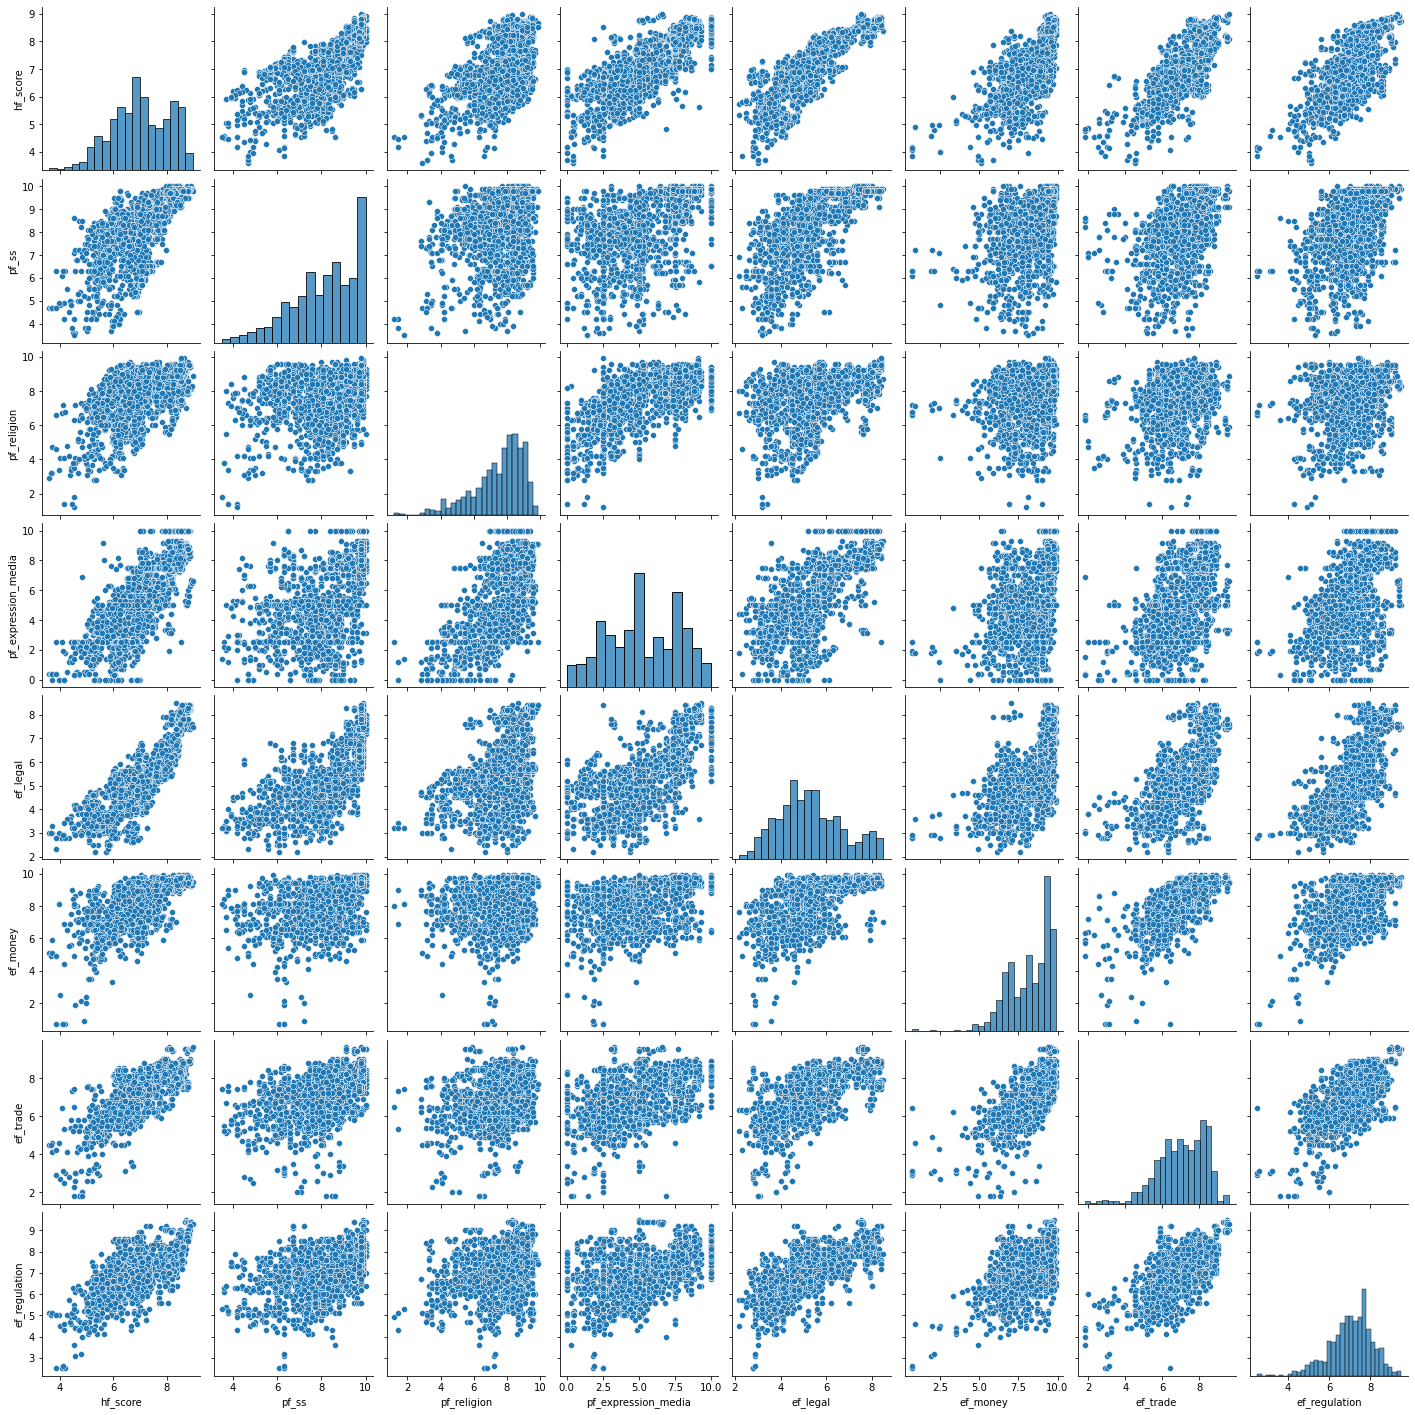

In [50]:
sns.pairplot(hfi_sample[['hf_score',
                       'pf_ss','pf_religion','pf_expression_media',
                        'ef_legal','ef_money','ef_trade','ef_regulation']]);

* В облаках значений индекса в парах со всеми индикаторами можно увидеть в той или иной степени тенденцию к положительной линейной взаимосвязи. То есть увеличению индекса сопуствует увеличение индикаторов. 
* Между индикаторами pf_ss (безопасность) и ef_legal наблюдается некоторая нелинейная взаимосвязь, похоже на форму гиперболы.
* Следующие пары можно дальше проверить на положительную линейную корреляцию:
    - pf_religion и pf_expression_media
    - ef_legal и ef_regulation
    - ef_legal и ef_trade
    - ef_money и ef_trade
    - ef_trade и ef_regulation

<a href="#0"><h4>Наверх</h4></a>

<p id="10">
<h4>Индекс и индикаторы в среднем по регионам</h4>

Для графика группируем датафрейм по регионам и считаем среднее по всем индексам и индикаторам (кроме рейтингов) за все годы:

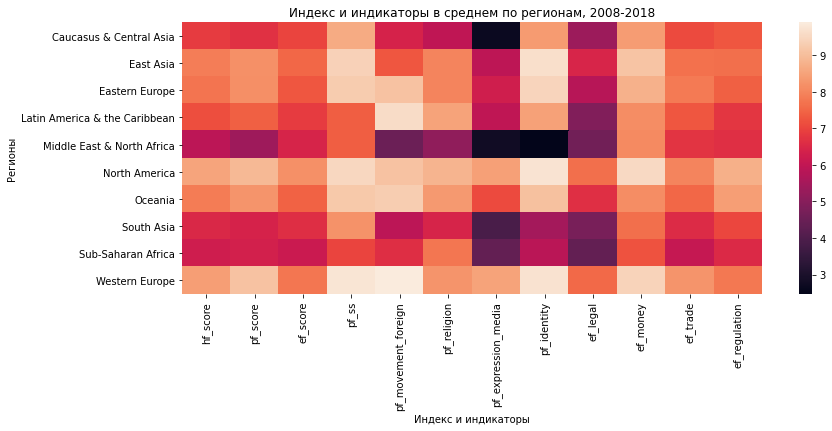

In [51]:
heatmap_reg_indic = (sns.heatmap(hfi_sample.drop(['year','hf_rank','pf_rank','ef_rank'], axis = 1).
                                 groupby('region').mean()))
heatmap_reg_indic.set(xlabel = 'Индекс и индикаторы')
heatmap_reg_indic.set(ylabel = 'Регионы')
heatmap_reg_indic.set_title('Индекс и индикаторы в среднем по регионам, 2008-2018');

* Наибольший разброс между регионами по индикаторам pf_identity и pf_expression_media.
* У North America и Western Europe похожий уровень по всем показателям.
* Наибольший разброс между индикаторами у Caucasus&Central Asia и Middle East&North Africa.
* Похожий уровень по регионам у hf_score, ef_score, ef_trade и ef_regulation.

<a href="#0"><h4>Наверх</h4></a>

<p id="11">
<h4>Распределение HF индекса 2018 vs 2008</h4>

Для графика используем значения индекса в 2008 и в 2018 годах:

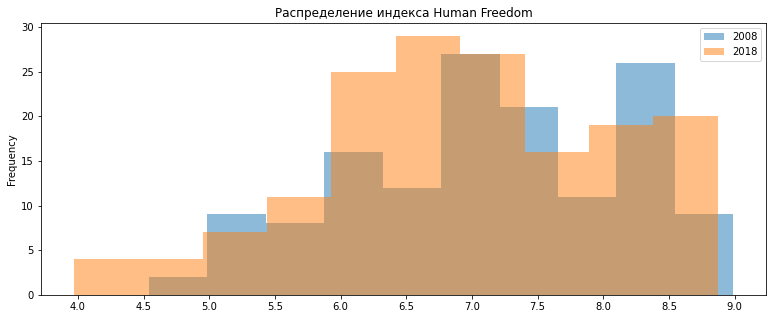

In [52]:
hfi_sample[hfi_sample.year == 2008].hf_score.plot(kind = 'hist',
                                                 alpha = 0.5, legend = True, xticks = np.arange(3, 9.1, 0.5))

hfi_sample[hfi_sample.year == 2018].hf_score.plot(kind = 'hist',
                                                 alpha = 0.5,
                                                 legend = True,
                                                 title = 'Распределение индекса Human Freedom')
leg = plt.legend()
leg.get_texts()[0].set_text('2008')
leg.get_texts()[1].set_text('2018')

* В 2008 распределение более разрозненное, с двумя модами около 7 и около 8.3.
* В 2018 распределение стало более концентрированным, большая часть сосредоточена в районе значений 6-7.5.
* В оба года правый хвост более объемный чем левый: низкие значения встречаются реже чем высокие.
* В 2018 левый хвост удлинился, появились более низкие значения.

<a href="#0"><h4>Наверх</h4></a>